<a href="https://colab.research.google.com/github/ghozali27/My-project-2024/blob/main/implementation_of_gaussian_naive_bayes_for_heart_attack_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, GridSearchCV, StratifiedKFold
from sklearn.model_selection import cross_val_predict
import joblib
from scipy.stats import zscore
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

for dirname, _, filenames in os.walk('Medicaldataset'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
heart = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Heart Attack Dataset/Medicaldataset.csv')
df = heart.copy()
df.head(10)

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Result
0,64,1,66,160,83,160.0,1.80,0.012,negative
1,21,1,94,98,46,296.0,6.75,1.060,positive
2,55,1,64,160,77,270.0,1.99,0.003,negative
3,64,1,70,120,55,270.0,13.87,0.122,positive
4,55,1,64,112,65,300.0,1.08,0.003,negative
5,58,0,61,112,58,87.0,1.83,0.004,negative
6,32,0,40,179,68,102.0,0.71,0.003,negative
7,63,1,60,214,82,87.0,300.00,2.370,positive
8,44,0,60,154,81,135.0,2.35,0.004,negative
9,67,1,61,160,95,100.0,2.84,0.011,negative


{'negative': 0, 'positive': 1}


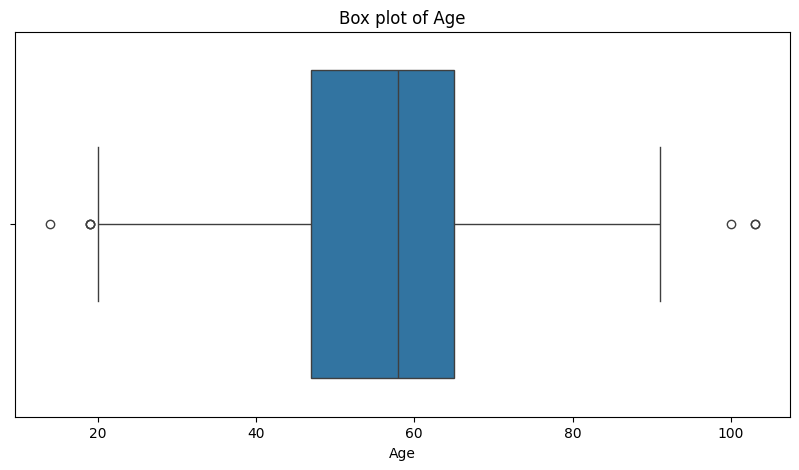

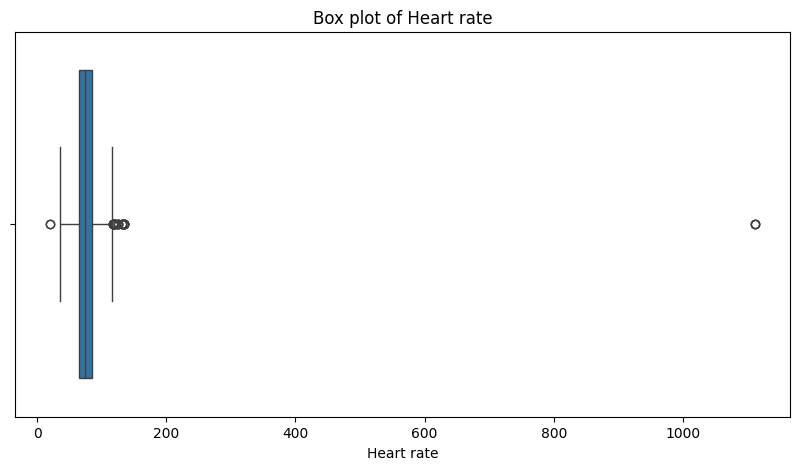

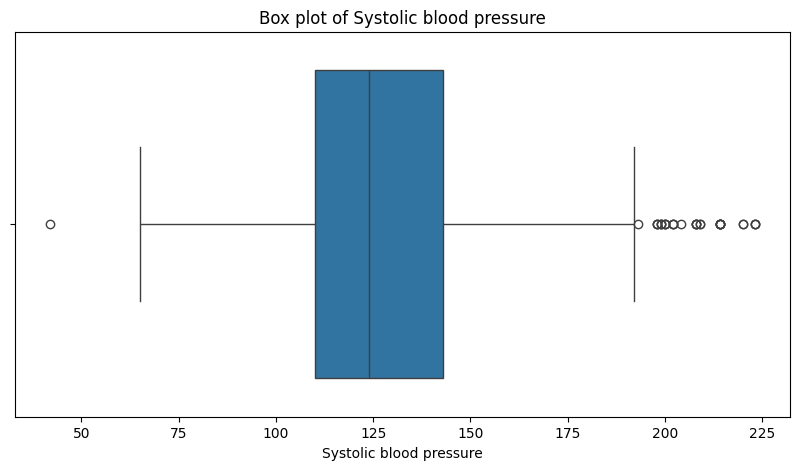

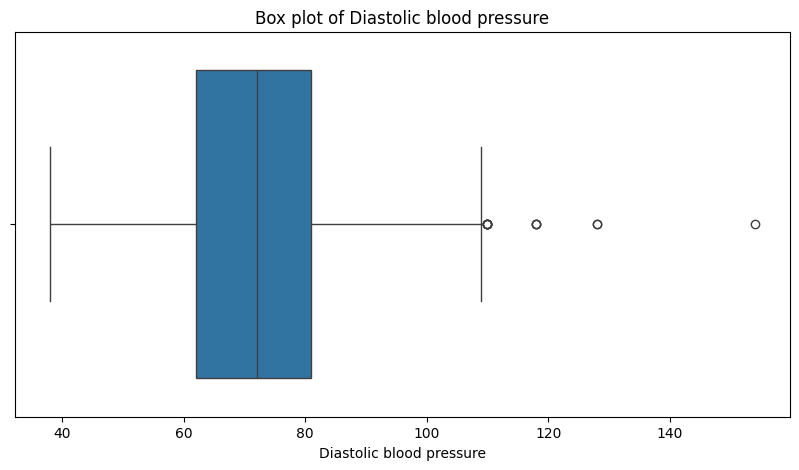

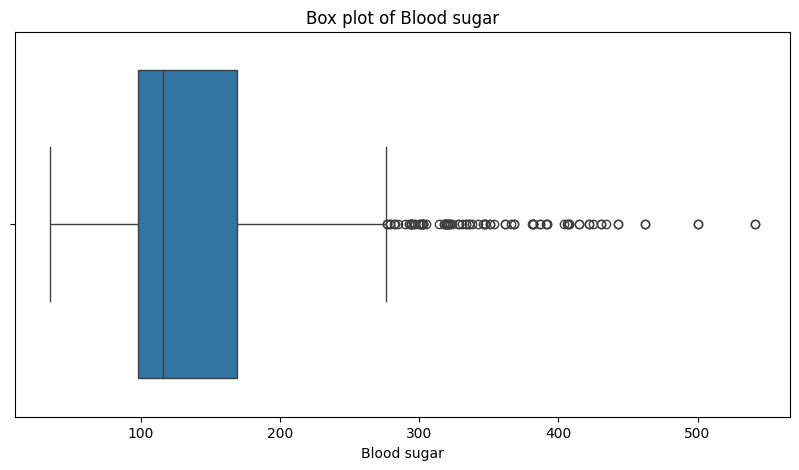

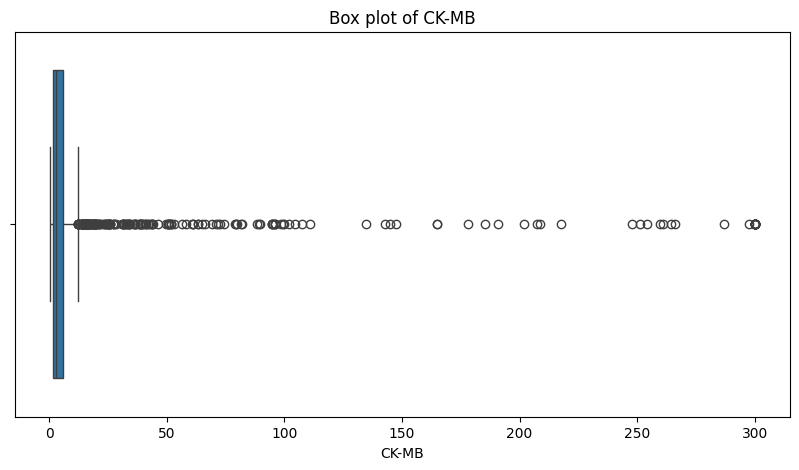

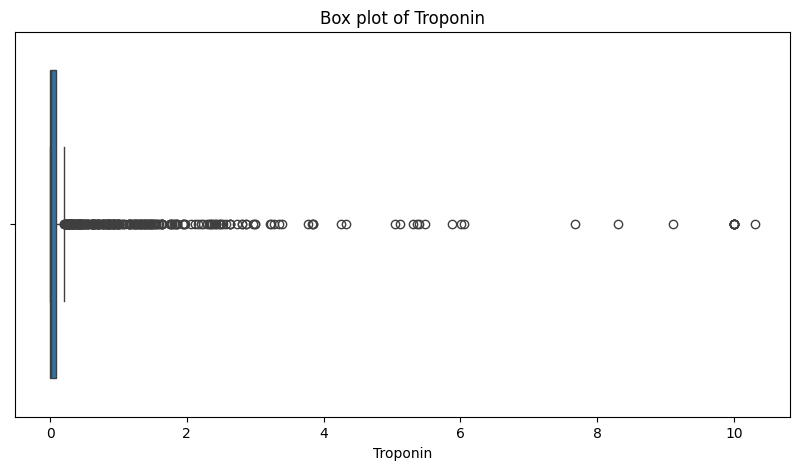

Model A:
Jumlah data train: 1087
Jumlah data test: 121

Model B:
Jumlah data train: 966
Jumlah data test: 242

Model C:
Jumlah data train: 845
Jumlah data test: 363

Model D:
Jumlah data train: 785
Jumlah data test: 423

Data Sebelum Normalisasi (Model A):
     Age  Gender  Heart rate  Systolic blood pressure  \
987   52       1          60                      117   
90    65       1          60                      175   
474   41       1          86                      113   
932   71       1         112                      115   
400   52       1          73                      161   

     Diastolic blood pressure  Blood sugar  CK-MB  Troponin  
987                        68        110.0   1.04     0.810  
90                         88        181.0   2.69     0.006  
474                        68        100.0   4.58     0.003  
932                        69        134.0   1.06     0.023  
400                        90         77.0   1.26     0.011  

Data Setelah Normalisasi (M

In [ ]:
#mengubah kolom kategoris menjadi kolom numerik
label_encoder = LabelEncoder()
label_encoder.fit(df["Result"])
class_mapping = dict(zip(label_encoder.classes_,
                label_encoder.transform(label_encoder.classes_)))
print(class_mapping)
df["Result"] = label_encoder.transform(df["Result"])

# Plot Boxplot for Outliers Detection
def plot_boxplot(data, column):
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=data[column])
    plt.title(f'Box plot of {column}')
    plt.show()

# Plot boxplot for each numeric feature
numeric_features = ['Age', 'Heart rate', 'Systolic blood pressure', 'Diastolic blood pressure', 'Blood sugar', 'CK-MB', 'Troponin']
for feature in numeric_features:
    plot_boxplot(df, feature)

# Remove Outliers using Z-score
for feature in numeric_features:
    df = df[(np.abs(zscore(df[feature])) < 3)]

# Menentukan fitur (X) dan target (y)
x = df.drop('Result', axis=1) # Fitur
y = df['Result'] # Target

# Melakukan split data
# Model A (90:10)
x_train_A, x_test_A, y_train_A, y_test_A = train_test_split(x, y, test_size=0.1, random_state=42)
print("Model A:")
print("Jumlah data train:", len(x_train_A))
print("Jumlah data test:", len(x_test_A))

# Model B (80:20)
x_train_B, x_test_B, y_train_B, y_test_B = train_test_split(x, y, test_size=0.2, random_state=42)
print("\nModel B:")
print("Jumlah data train:", len(x_train_B))
print("Jumlah data test:", len(x_test_B))

# Model C (70:30)
x_train_C, x_test_C, y_train_C, y_test_C = train_test_split(x, y, test_size=0.3, random_state=42)
print("\nModel C:")
print("Jumlah data train:", len(x_train_C))
print("Jumlah data test:", len(x_test_C))

# Model D (65:35)
x_train_D, x_test_D, y_train_D, y_test_D = train_test_split(x, y, test_size=0.35, random_state=42)
print("\nModel D:")
print("Jumlah data train:", len(x_train_D))
print("Jumlah data test:", len(x_test_D))

# Melakukan transformasi data standard scaling terhadap fitur-fitur numerik
scaler = StandardScaler()
x_train_A_scaled = scaler.fit_transform(x_train_A)
x_test_A_scaled = scaler.transform(x_test_A)
x_train_B_scaled = scaler.fit_transform(x_train_B)
x_test_B_scaled = scaler.transform(x_test_B)
x_train_C_scaled = scaler.fit_transform(x_train_C)
x_test_C_scaled = scaler.transform(x_test_C)
x_train_D_scaled = scaler.fit_transform(x_train_D)
x_test_D_scaled = scaler.transform(x_test_D)

# Menampilkan tabel normalisasi
x_train_A_df = pd.DataFrame(x_train_A, columns=x.columns)
x_train_A_scaled_df = pd.DataFrame(x_train_A_scaled, columns=x.columns)
print("\nData Sebelum Normalisasi (Model A):")
print(x_train_A_df.head())
print("\nData Setelah Normalisasi (Model A):")
print(x_train_A_scaled_df.head())

x_train_B_df = pd.DataFrame(x_train_B, columns=x.columns)
x_train_B_scaled_df = pd.DataFrame(x_train_B_scaled, columns=x.columns)
print("\nData Sebelum Normalisasi (Model B):")
print(x_train_B_df.head())
print("\nData Setelah Normalisasi (Model B):")
print(x_train_B_scaled_df.head())

x_train_C_df = pd.DataFrame(x_train_C, columns=x.columns)
x_train_C_scaled_df = pd.DataFrame(x_train_C_scaled, columns=x.columns)
print("\nData Sebelum Normalisasi (Model C):")
print(x_train_C_df.head())
print("\nData Setelah Normalisasi (Model C):")
print(x_train_C_scaled_df.head())

x_train_D_df = pd.DataFrame(x_train_D, columns=x.columns)
x_train_D_scaled_df = pd.DataFrame(x_train_D_scaled, columns=x.columns)
print("\nData Sebelum Normalisasi (Model D):")
print(x_train_D_df.head())
print("\nData Setelah Normalisasi (Model D):")
print(x_train_D_scaled_df.head())

# Menggunakan GridSearchCV untuk mencari parameter terbaik untuk Model A
param_grid_A = {'var_smoothing': np.logspace(0,-9, num=100)}
nb_model_A = GaussianNB()
grid_search_A = GridSearchCV(nb_model_A, param_grid_A, cv=10)
grid_search_A.fit(x_train_A, y_train_A)

# Menampilkan parameter terbaik Model A
print("Parameter terbaik Model A:", grid_search_A.best_params_)

# Menampilkan skor validasi silang terbaik Model A
print("Skor validasi silang terbaik Model A:", grid_search_A.best_score_)

# Menampilkan model terbaik Model A
best_model_A = grid_search_A.best_estimator_
print("Model terbaik Model A:")
print(best_model_A)

# Menggunakan GridSearchCV untuk mencari parameter terbaik untuk Model B
param_grid_B = {'var_smoothing': np.logspace(0,-9, num=100)}
nb_model_B = GaussianNB()
grid_search_B = GridSearchCV(nb_model_B, param_grid_B, cv=10)
grid_search_B.fit(x_train_B, y_train_B)

# Menampilkan parameter terbaik Model B
print("\nParameter terbaik Model B:", grid_search_B.best_params_)

# Menampilkan skor validasi silang terbaik Model B
print("Skor validasi silang terbaik Model B:", grid_search_B.best_score_)

# Menampilkan model terbaik Model B
best_model_B = grid_search_B.best_estimator_
print("Model terbaik Model B:")
print(best_model_B)

# Menggunakan GridSearchCV untuk mencari parameter terbaik untuk Model C
param_grid_C = {'var_smoothing': np.logspace(0,-9, num=100)}
nb_model_C = GaussianNB()
grid_search_C = GridSearchCV(nb_model_C, param_grid_C, cv=10)
grid_search_C.fit(x_train_C, y_train_C)

# Menampilkan parameter terbaik Model C
print("\nParameter terbaik Model C:", grid_search_C.best_params_)

# Menampilkan skor validasi silang terbaik Model C
print("Skor validasi silang terbaik Model C:", grid_search_C.best_score_)

# Menampilkan model terbaik Model C
best_model_C = grid_search_C.best_estimator_
print("Model terbaik Model C:")
print(best_model_C)

# Menggunakan GridSearchCV untuk mencari parameter terbaik untuk Model D
param_grid_D = {'var_smoothing': np.logspace(0,-9, num=100)}
nb_model_D = GaussianNB()
grid_search_D = GridSearchCV(nb_model_D, param_grid_D, cv=10)
grid_search_D.fit(x_train_D, y_train_D)

# Menampilkan parameter terbaik Model D
print("\nParameter terbaik Model D:", grid_search_D.best_params_)

# Menampilkan skor validasi silang terbaik Model D
print("Skor validasi silang terbaik Model D:", grid_search_D.best_score_)

# Menampilkan model terbaik Model D
best_model_D = grid_search_D.best_estimator_
print("Model terbaik Model D:")
print(best_model_D)




In [ ]:
def initiate_model(model, x_train_A, x_test_A, y_train_A, y_test_A):
    y_pred_A = model.fit(x_train_A, y_train_A).predict(x_test_A)
    accuracy = accuracy_score(y_test_A, y_pred_A)
    print("Accuracy:", accuracy)
    print('#'*60)
    print((model.__class__.__name__).center(60,' '))
    print('#'*60)
    print('Number of mislabeled points out of a total {} points : {} \n'.format(x_test_A.shape[0], (y_test_A != y_pred_A).sum()))
    print(classification_report(y_test_A, y_pred_A, target_names=['0','1'], zero_division='warn'))
    print('#'*60)

    # Melakukan evaluasi dengan confusion matrix
    cm = confusion_matrix(y_test_A, y_pred_A)
    df1 = pd.DataFrame(columns=["0","1"], index= ["0","1"], data= cm )
    f,ax = plt.subplots(figsize=(5,5))
    sns.heatmap(df1, annot=True,cmap="Purples", fmt= '.0f',
                ax=ax,linewidths = 5, cbar = False,annot_kws={"size": 16})
    plt.xlabel("Predicted Label")
    plt.xticks(size = 12)
    plt.yticks(size = 12, rotation = 0)
    plt.ylabel("True Label")
    plt.title("{} Confusion Matrix".format(model.__class__.__name__), size = 14)

    # tampilkan hasil
    y_pred_A = model_A.predict(x_test_A)

    # Membuat DataFrame dari data test dan hasil prediksi
    df_result_A = pd.DataFrame({'Actual': y_test_A, 'Predicted': y_pred_A})

    # Menampilkan tabel hasil prediksi beserta atribut-atribut datanya
    print("Hasil Model A:")
    print(df_result_A)

Accuracy: 0.8677685950413223
############################################################
                         GaussianNB                         
############################################################
Number of mislabeled points out of a total 121 points : 16 

              precision    recall  f1-score   support

           0       0.74      1.00      0.85        46
           1       1.00      0.79      0.88        75

    accuracy                           0.87       121
   macro avg       0.87      0.89      0.87       121
weighted avg       0.90      0.87      0.87       121

############################################################
Hasil Model A:
      Actual  Predicted
115        1          1
819        1          0
335        0          0
123        1          1
703        0          0
...      ...        ...
1240       1          1
846        0          0
500        1          1
751        1          1
589        1          1

[121 rows x 2 columns]


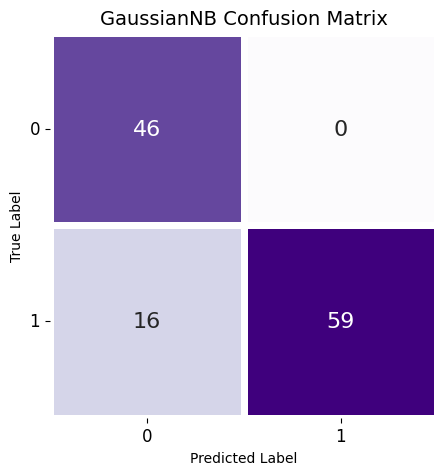

In [ ]:
plt.show()
initiate_model(GaussianNB(), x_train_A, x_test_A, y_train_A, y_test_A)

In [ ]:
def initiate_model(model,x_train_B, x_test_B, y_train_B, y_test_B):
    y_pred_B = model.fit(x_train_B, y_train_B).predict(x_test_B)
    accuracy = accuracy_score(y_test_B, y_pred_B)
    print("Accuracy:", accuracy)
    print('#'*60)
    print((model.__class__.__name__).center(60,' '))
    print('#'*60)
    print('Number of mislabeled points out of a total {} points : {} \n'.format(x_test_B.shape[0], (y_test_B != y_pred_B).sum()))
    print(classification_report(y_test_B, y_pred_B, target_names=['0','1'], zero_division='warn'))
    print('#'*60)

    # Melakukan evaluasi dengan confusion matrix
    cm = confusion_matrix(y_test_B, y_pred_B)
    df1 = pd.DataFrame(columns=["0","1"], index= ["0","1"], data= cm )
    f,ax = plt.subplots(figsize=(5,5))
    sns.heatmap(df1, annot=True,cmap="Purples", fmt= '.0f',
                ax=ax,linewidths = 5, cbar = False,annot_kws={"size": 16})
    plt.xlabel("Predicted Label")
    plt.xticks(size = 12)
    plt.yticks(size = 12, rotation = 0)
    plt.ylabel("True Label")
    plt.title("{} Confusion Matrix".format(model.__class__.__name__), size = 14)

    # tampilkan hasil
    y_pred_B = model_B.predict(x_test_B)

    # Membuat DataFrame dari data test dan hasil prediksi
    df_result_B = pd.DataFrame({'Actual': y_test_B, 'Predicted': y_pred_B})

    # Menampilkan tabel hasil prediksi beserta atribut-atribut datanya
    print("Hasil Model B:")
    print(df_result_B)


Accuracy: 0.9049586776859504
############################################################
                         GaussianNB                         
############################################################
Number of mislabeled points out of a total 242 points : 23 

              precision    recall  f1-score   support

           0       0.81      1.00      0.89        95
           1       1.00      0.84      0.92       147

    accuracy                           0.90       242
   macro avg       0.90      0.92      0.90       242
weighted avg       0.92      0.90      0.91       242

############################################################
Hasil Model B:
      Actual  Predicted
115        1          1
819        1          0
335        0          0
123        1          1
703        0          0
...      ...        ...
453        0          0
479        1          0
985        1          1
1100       0          0
498        1          1

[242 rows x 2 columns]


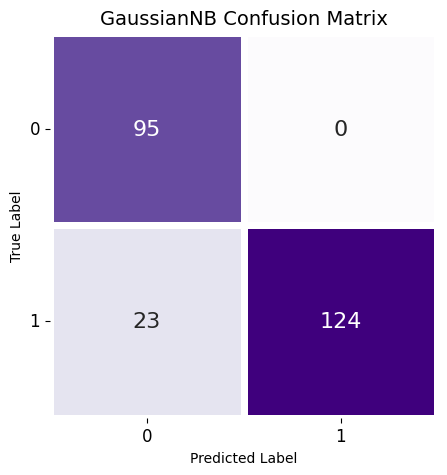

In [ ]:
plt.show()
initiate_model(GaussianNB(), x_train_B, x_test_B, y_train_B, y_test_B)

In [ ]:
def initiate_model(model,x_train_C, x_test_C, y_train_C, y_test_C):
    y_pred_C = model.fit(x_train_C, y_train_C).predict(x_test_C)
    accuracy = accuracy_score(y_test_C, y_pred_C)
    print("Accuracy:", accuracy)
    print('#'*60)
    print((model.__class__.__name__).center(60,' '))
    print('#'*60)
    print('Number of mislabeled points out of a total {} points : {} \n'.format(x_test_C.shape[0], (y_test_C != y_pred_C).sum()))
    print(classification_report(y_test_C, y_pred_C, target_names=['0','1'], zero_division='warn'))
    print('#'*60)

    # Melakukan evaluasi dengan confusion matrix
    cm = confusion_matrix(y_test_C, y_pred_C)
    df1 = pd.DataFrame(columns=["0","1"], index= ["0","1"], data= cm )
    f,ax = plt.subplots(figsize=(5,5))
    sns.heatmap(df1, annot=True,cmap="Purples", fmt= '.0f',
                ax=ax,linewidths = 5, cbar = False,annot_kws={"size": 16})
    plt.xlabel("Predicted Label")
    plt.xticks(size = 12)
    plt.yticks(size = 12, rotation = 0)
    plt.ylabel("True Label")
    plt.title("{} Confusion Matrix".format(model.__class__.__name__), size = 14)

    # tampilkan hasil
    y_pred_C = model_A.predict(x_test_C)

    # Membuat DataFrame dari data test dan hasil prediksi
    df_result_C = pd.DataFrame({'Actual': y_test_C, 'Predicted': y_pred_C})

    # Menampilkan tabel hasil prediksi beserta atribut-atribut datanya
    print("Hasil Model C:")
    print(df_result_C)

Accuracy: 0.9118457300275482
############################################################
                         GaussianNB                         
############################################################
Number of mislabeled points out of a total 363 points : 32 

              precision    recall  f1-score   support

           0       0.82      1.00      0.90       141
           1       1.00      0.86      0.92       222

    accuracy                           0.91       363
   macro avg       0.91      0.93      0.91       363
weighted avg       0.93      0.91      0.91       363

############################################################
Hasil Model C:
      Actual  Predicted
115        1          1
819        1          0
335        0          0
123        1          1
703        0          0
...      ...        ...
410        1          1
947        1          1
792        0          0
1056       1          1
807        1          1

[363 rows x 2 columns]


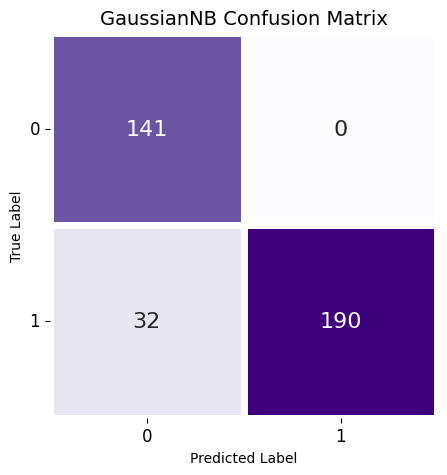

In [ ]:
plt.show()
initiate_model(GaussianNB(), x_train_C, x_test_C, y_train_C, y_test_C)

In [ ]:
def initiate_model(model,x_train_D, x_test_D, y_train_D, y_test_D):
    y_pred_D = model.fit(x_train_D, y_train_D).predict(x_test_D)
    accuracy = accuracy_score(y_test_D, y_pred_D)
    print("Accuracy:", accuracy)
    print('#'*60)
    print((model.__class__.__name__).center(60,' '))
    print('#'*60)
    print('Number of mislabeled points out of a total {} points : {} \n'.format(x_test_D.shape[0], (y_test_D != y_pred_D).sum()))
    print(classification_report(y_test_D, y_pred_D, target_names=['0','1'], zero_division='warn'))
    print('#'*60)

    # Melakukan evaluasi dengan confusion matrix
    cm = confusion_matrix(y_test_D, y_pred_D)
    df1 = pd.DataFrame(columns=["0","1"], index= ["0","1"], data= cm )
    f,ax = plt.subplots(figsize=(5,5))
    sns.heatmap(df1, annot=True,cmap="Purples", fmt= '.0f',
                ax=ax,linewidths = 5, cbar = False,annot_kws={"size": 16})
    plt.xlabel("Predicted Label")
    plt.xticks(size = 12)
    plt.yticks(size = 12, rotation = 0)
    plt.ylabel("True Label")
    plt.title("{} Confusion Matrix".format(model.__class__.__name__), size = 14)

    # tampilkan hasil
    y_pred_D = model_D.predict(x_test_D)

    # Membuat DataFrame dari data test dan hasil prediksi
    df_result_D = pd.DataFrame({'Actual': y_test_D, 'Predicted': y_pred_D})

    # Menampilkan tabel hasil prediksi beserta atribut-atribut datanya
    print("Hasil Model D:")
    print(df_result_D)

Accuracy: 0.9054373522458629
############################################################
                         GaussianNB                         
############################################################
Number of mislabeled points out of a total 423 points : 40 

              precision    recall  f1-score   support

           0       0.80      1.00      0.89       160
           1       1.00      0.85      0.92       263

    accuracy                           0.91       423
   macro avg       0.90      0.92      0.90       423
weighted avg       0.92      0.91      0.91       423

############################################################
Hasil Model D:
      Actual  Predicted
115        1          1
819        1          0
335        0          0
123        1          1
703        0          0
...      ...        ...
544        0          0
798        1          0
199        1          0
1086       0          0
765        1          1

[423 rows x 2 columns]


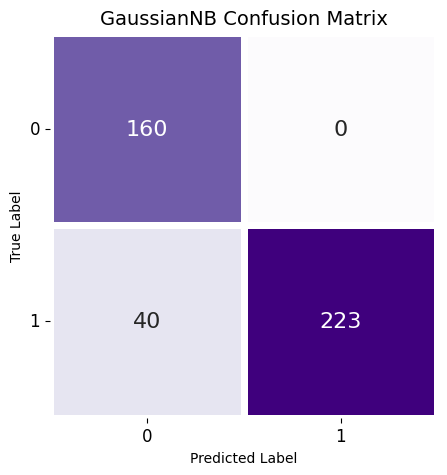

In [ ]:
plt.show()
initiate_model(GaussianNB(), x_train_D, x_test_D, y_train_D, y_test_D)

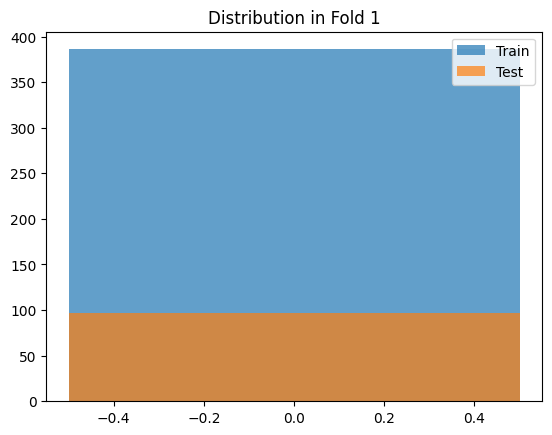

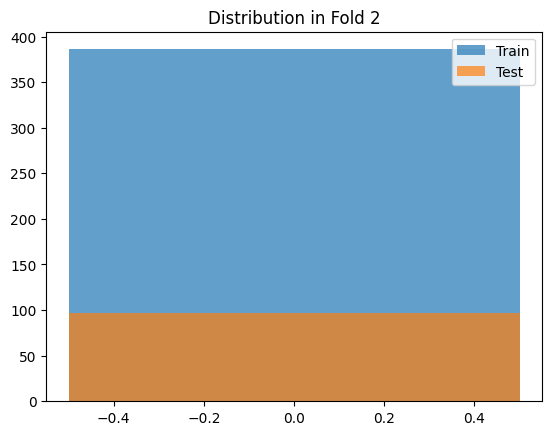

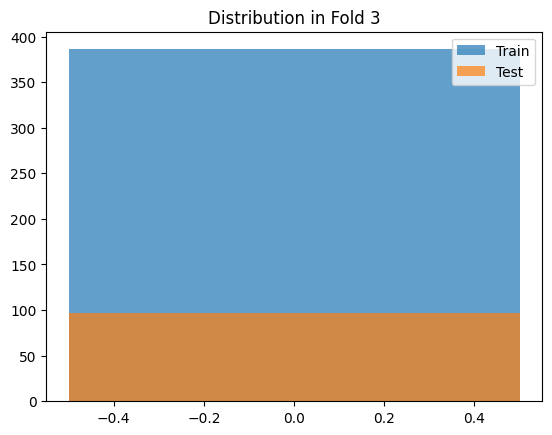

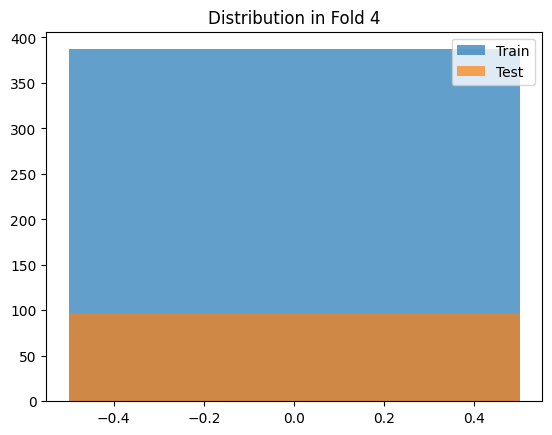

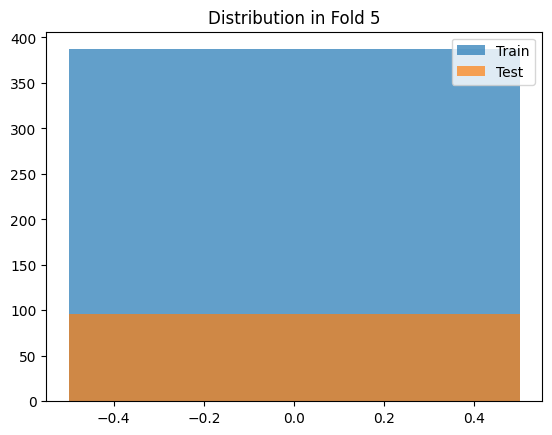

Evaluasi Cross-Validation secara keseluruhan:
Cross-validation scores (cv=5): [0.90082645 0.90909091 0.93801653 0.90041494 0.92116183]
Mean CV accuracy (cv=5): 0.9139
############################################################
Confusion Matrix:
[[483   0]
 [104 621]]
Classification Report:
              precision    recall  f1-score   support

           0       0.82      1.00      0.90       483
           1       1.00      0.86      0.92       725

    accuracy                           0.91      1208
   macro avg       0.91      0.93      0.91      1208
weighted avg       0.93      0.91      0.91      1208

############################################################


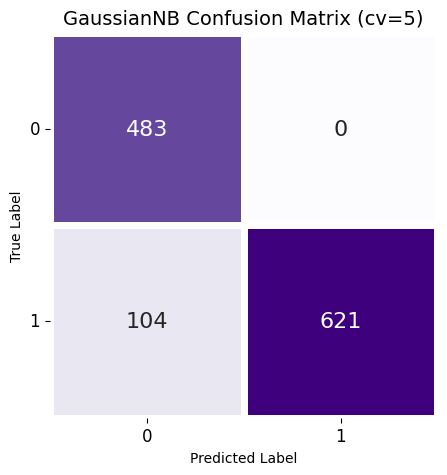

Cross-validation scores (cv=10): [0.92561983 0.88429752 0.90909091 0.90082645 0.90909091 0.96694215
 0.90082645 0.90082645 0.925      0.91666667]
Mean CV accuracy (cv=10): 0.9139
############################################################
Confusion Matrix:
[[483   0]
 [104 621]]
Classification Report:
              precision    recall  f1-score   support

           0       0.82      1.00      0.90       483
           1       1.00      0.86      0.92       725

    accuracy                           0.91      1208
   macro avg       0.91      0.93      0.91      1208
weighted avg       0.93      0.91      0.91      1208

############################################################


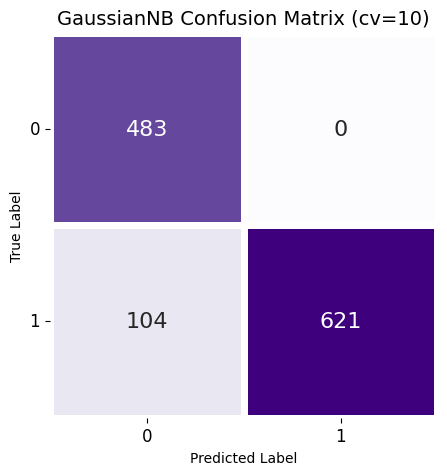

Cross-validation scores (cv=15): [0.90123457 0.95061728 0.86419753 0.88888889 0.92592593 0.90123457
 0.90123457 0.95061728 0.9625     0.8875     0.8875     0.925
 0.9375     0.925      0.9       ]
Mean CV accuracy (cv=15): 0.9139
############################################################
Confusion Matrix:
[[483   0]
 [104 621]]
Classification Report:
              precision    recall  f1-score   support

           0       0.82      1.00      0.90       483
           1       1.00      0.86      0.92       725

    accuracy                           0.91      1208
   macro avg       0.91      0.93      0.91      1208
weighted avg       0.93      0.91      0.91      1208

############################################################


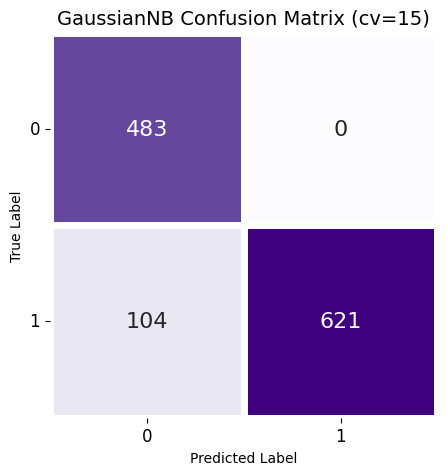

Cross-validation scores (cv=20): [0.8852459  0.96721311 0.8852459  0.86885246 0.8852459  0.93442623
 0.91803279 0.90163934 0.86666667 0.95       0.96666667 0.96666667
 0.85       0.95       0.85       0.95       0.95       0.9
 0.95       0.88333333]
Mean CV accuracy (cv=20): 0.9140
############################################################
Confusion Matrix:
[[483   0]
 [104 621]]
Classification Report:
              precision    recall  f1-score   support

           0       0.82      1.00      0.90       483
           1       1.00      0.86      0.92       725

    accuracy                           0.91      1208
   macro avg       0.91      0.93      0.91      1208
weighted avg       0.93      0.91      0.91      1208

############################################################


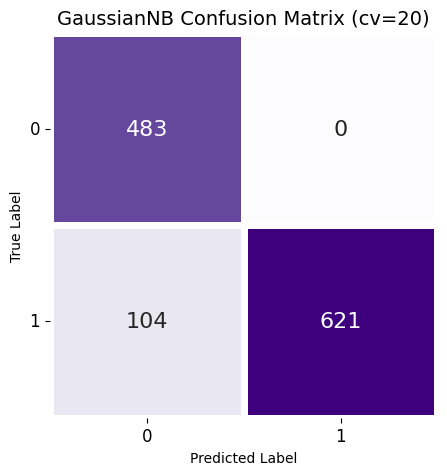

Fold 5 Accuracies: [0.90082645 0.90909091 0.93801653 0.90041494 0.92116183]
Mean Accuracy: 0.9139
Standard Deviation: 0.0142
############################################################
Fold 10 Accuracies: [0.92561983 0.88429752 0.90909091 0.90082645 0.90909091 0.96694215
 0.90082645 0.90082645 0.925      0.91666667]
Mean Accuracy: 0.9139
Standard Deviation: 0.0213
############################################################
Fold 15 Accuracies: [0.90123457 0.95061728 0.86419753 0.88888889 0.92592593 0.90123457
 0.90123457 0.95061728 0.9625     0.8875     0.8875     0.925
 0.9375     0.925      0.9       ]
Mean Accuracy: 0.9139
Standard Deviation: 0.0273
############################################################
Fold 20 Accuracies: [0.8852459  0.96721311 0.8852459  0.86885246 0.8852459  0.93442623
 0.91803279 0.90163934 0.86666667 0.95       0.96666667 0.96666667
 0.85       0.95       0.85       0.95       0.95       0.9
 0.95       0.88333333]
Mean Accuracy: 0.9140
Standard Deviatio

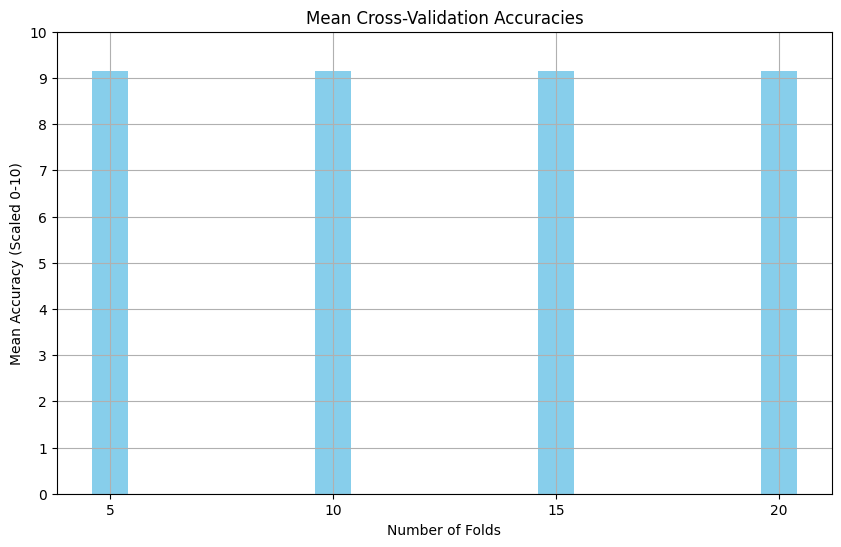

In [ ]:
# Fungsi untuk visualisasi distribusi data di setiap lipatan
def plot_data_distribution(X, y, n_splits):
    skf = StratifiedKFold(n_splits=n_splits)
    fold = 1
    for train_index, test_index in skf.split(X, y):
        plt.figure()
        # Convert the Series to a NumPy array to use positional indexing
        y_train = y.iloc[train_index].values
        y_test = y.iloc[test_index].values
        plt.hist(y_train, bins=np.arange(0, np.max(y_train)+1)-0.5, alpha=0.7, label='Train')
        plt.hist(y_test, bins=np.arange(0, np.max(y_test)+1)-0.5, alpha=0.7, label='Test')
        plt.title(f'Distribution in Fold {fold}')
        plt.legend()
        plt.show()
        fold += 1

# Fungsi untuk evaluasi model dengan cross-validation
def evaluate_model_cross_validation(model, X, y, cv_folds):
    all_accuracies = []
    mean_accuracies = []
    for cv in cv_folds:
        cv_scores = cross_val_score(model, X, y, cv=cv)
        all_accuracies.append(cv_scores)
        mean_accuracies.append(cv_scores.mean())
        print(f"Cross-validation scores (cv={cv}): {cv_scores}")
        print(f"Mean CV accuracy (cv={cv}): {cv_scores.mean():.4f}")
        print('#' * 60)

        # Melakukan prediksi dan evaluasi di dalam fungsi
        y_pred = cross_val_predict(model, X, y, cv=cv)
        cm = confusion_matrix(y, y_pred)
        print("Confusion Matrix:")
        print(cm)
        print("Classification Report:")
        print(classification_report(y, y_pred))
        print('#' * 60)

        # Mengonversi confusion matrix ke dalam DataFrame
        df_cm = pd.DataFrame(cm, index=[i for i in range(cm.shape[0])], columns=[i for i in range(cm.shape[1])])

        # Menampilkan confusion matrix sebagai heatmap
        plt.figure(figsize=(5, 5))
        sns.heatmap(df_cm, annot=True, cmap="Purples", fmt='g', linewidths=5, cbar=False, annot_kws={"size": 16})
        plt.xlabel("Predicted Label")
        plt.ylabel("True Label")
        plt.title(f"{model.__class__.__name__} Confusion Matrix (cv={cv})", size=14)
        plt.xticks(size=12)
        plt.yticks(size=12, rotation=0)
        plt.show()

    return all_accuracies, mean_accuracies

# Fungsi untuk evaluasi variabilitas
def evaluate_variability(all_accuracies, cv_folds):
    for i, acc in enumerate(all_accuracies):
        print(f"Fold {cv_folds[i]} Accuracies: {acc}")
        print(f"Mean Accuracy: {np.mean(acc):.4f}")
        print(f"Standard Deviation: {np.std(acc):.4f}")
        print('#' * 60)

def plot_mean_accuracy(mean_accuracies, cv_folds):
    plt.figure(figsize=(10, 6))
    # Konversi mean accuracies ke skala 0-10
    scaled_mean_accuracies = [acc * 10 for acc in mean_accuracies]
    plt.bar(cv_folds, scaled_mean_accuracies, color='skyblue')
    plt.title('Mean Cross-Validation Accuracies')
    plt.xlabel('Number of Folds')
    plt.ylabel('Mean Accuracy (Scaled 0-10)')
    plt.xticks(cv_folds)
    plt.yticks(range(11))
    plt.ylim(0, 10)
    plt.grid(True)
    plt.show()

# Memanggil fungsi-fungsi tersebut
def main():
    # Plot distribusi data untuk K=5
    plot_data_distribution(x, y, 5)

    # Melakukan cross-validation dengan lipatan 5, 10, 15, 20
    cv_folds = [5, 10, 15, 20]
    print("Evaluasi Cross-Validation secara keseluruhan:")
    all_accuracies, mean_accuracies = evaluate_model_cross_validation(GaussianNB(), x, y, cv_folds)

    # Evaluasi variabilitas
    evaluate_variability(all_accuracies, cv_folds)

    # Plot grafik histogram rata-rata akurasi
    plot_mean_accuracy(mean_accuracies, cv_folds)

# Jalankan main function
main()

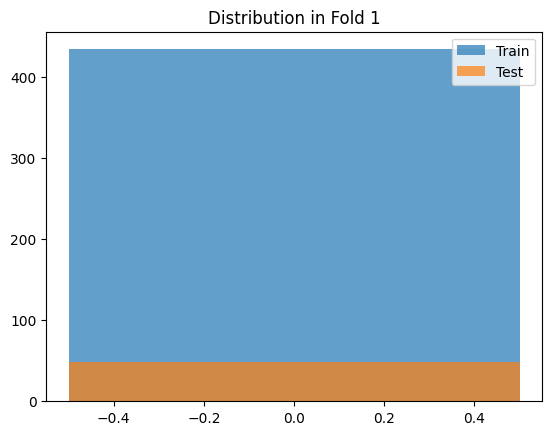

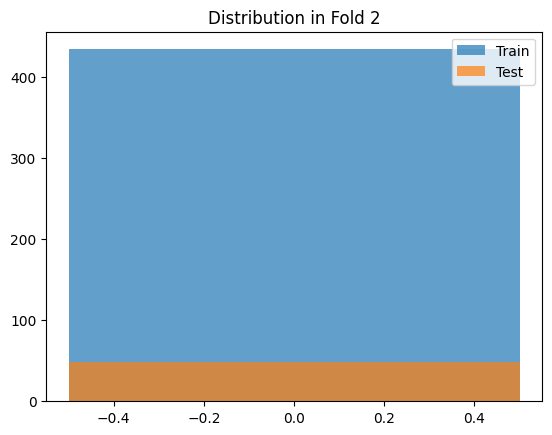

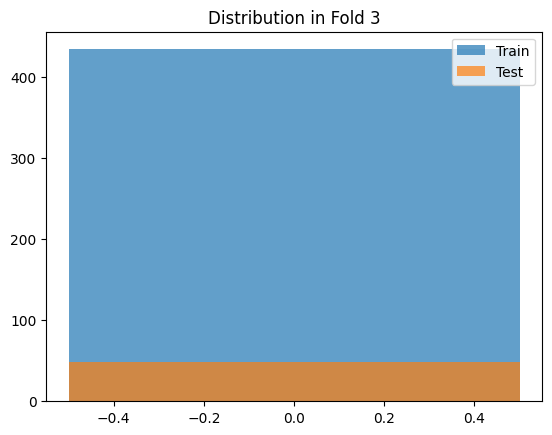

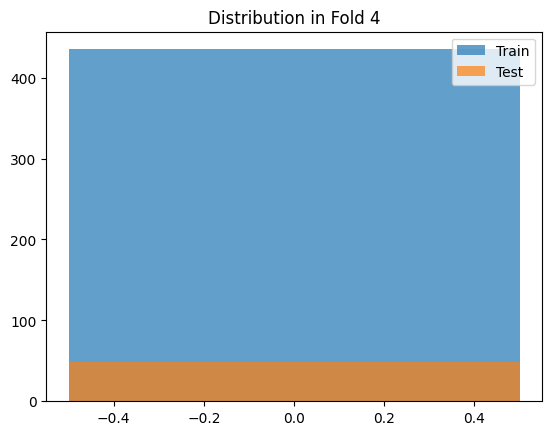

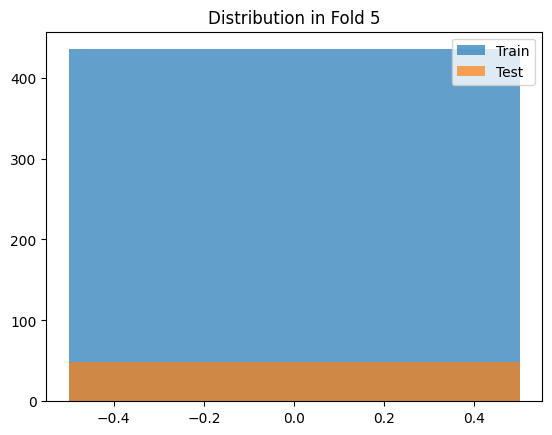

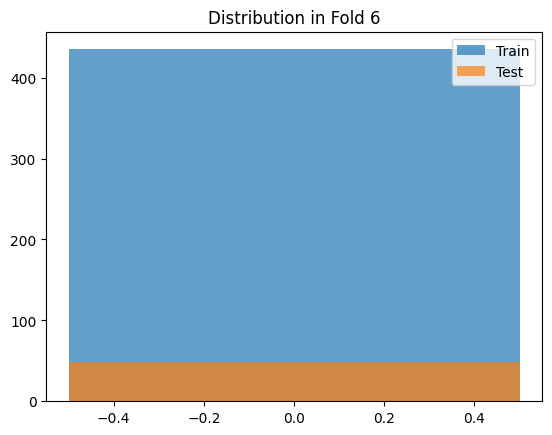

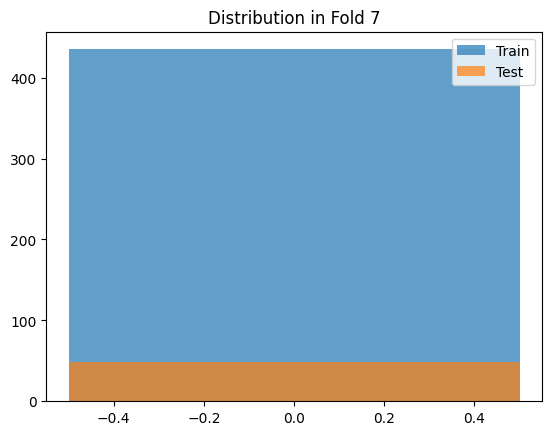

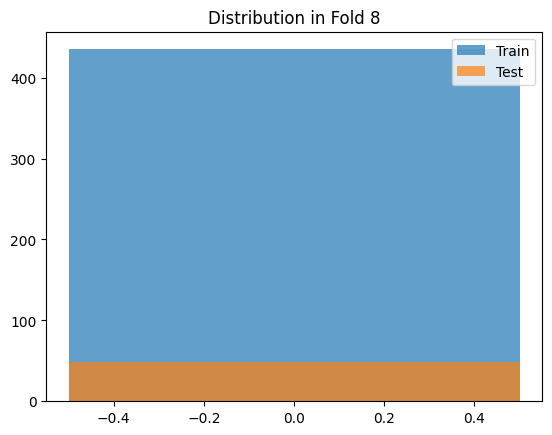

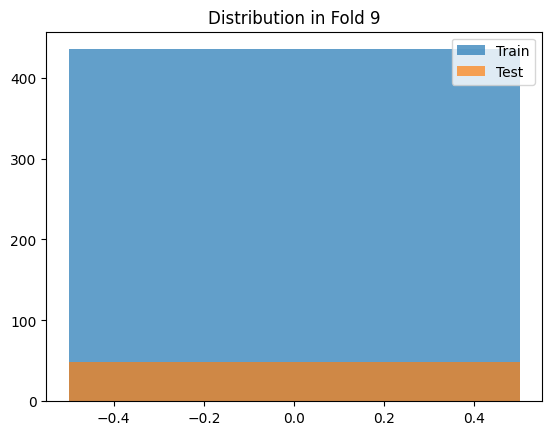

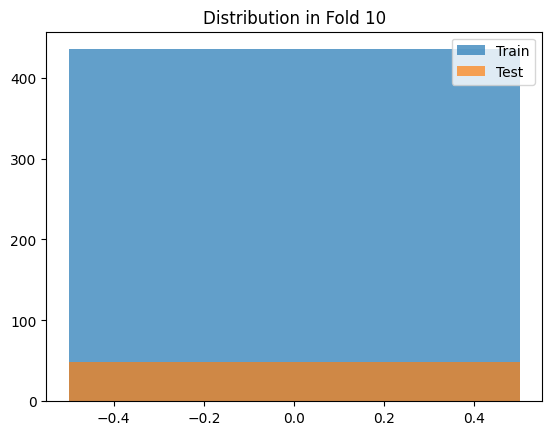

In [ ]:
plot_data_distribution(x, y, 10)


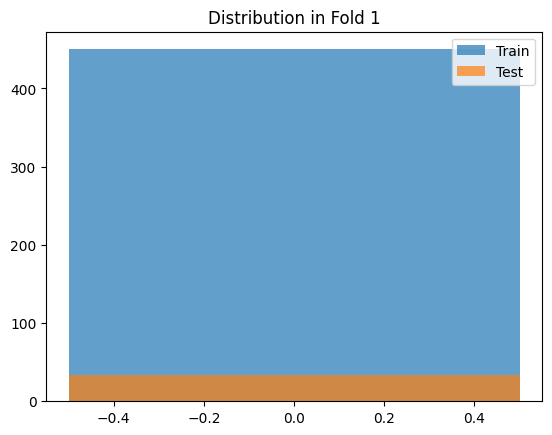

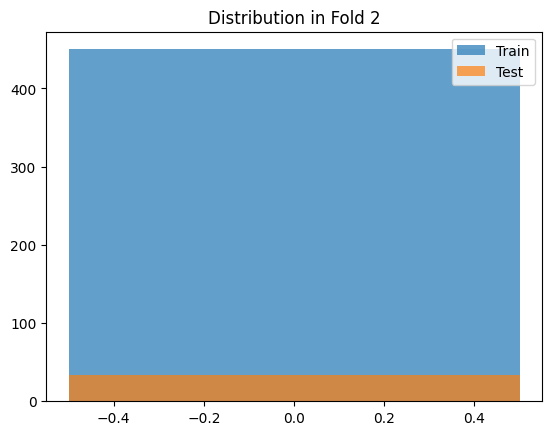

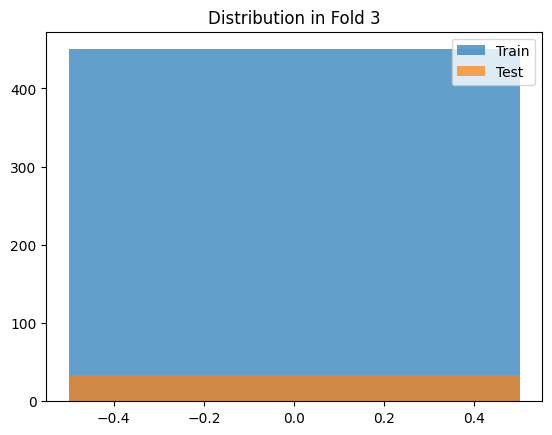

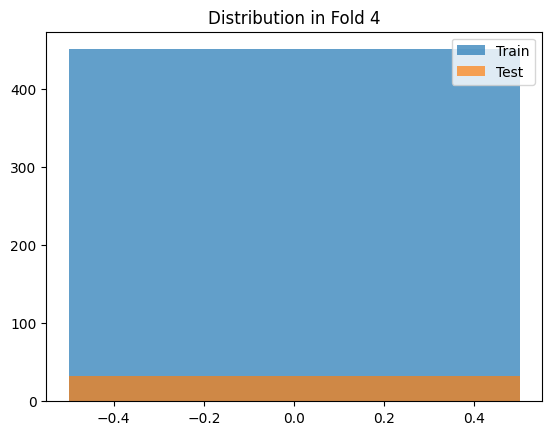

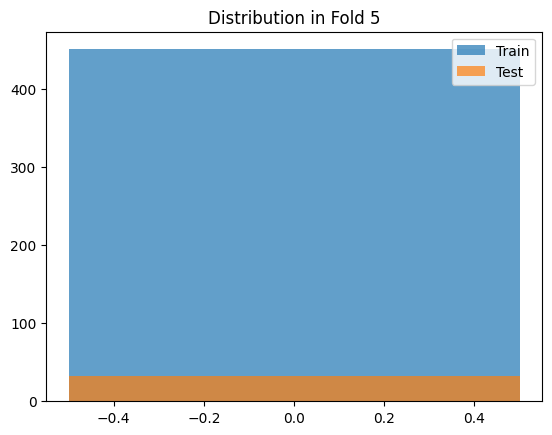

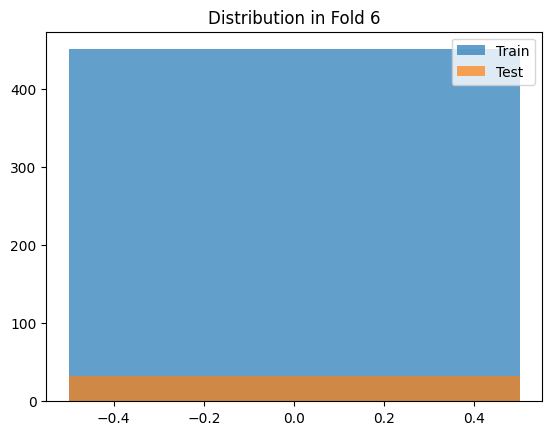

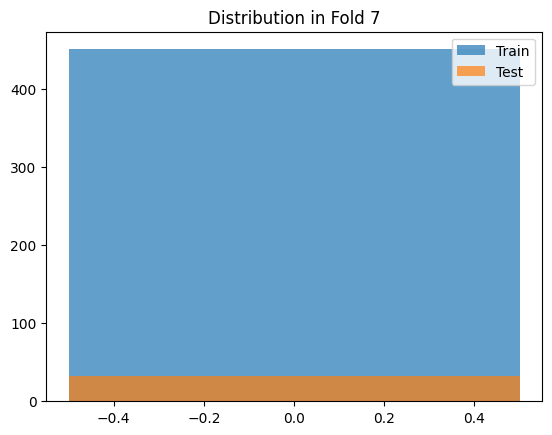

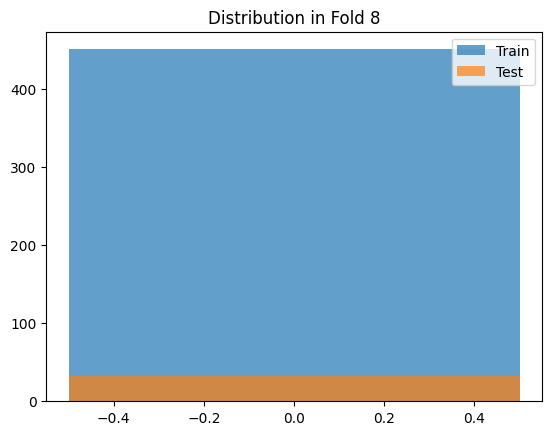

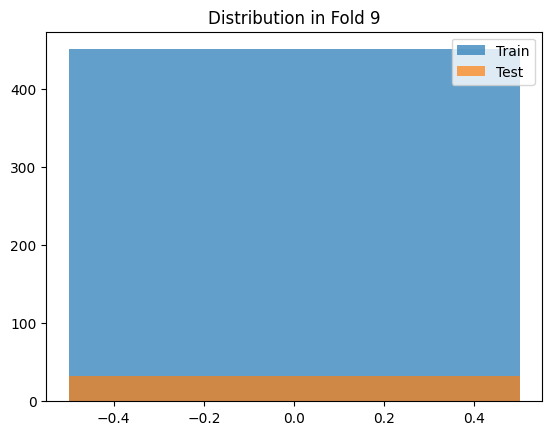

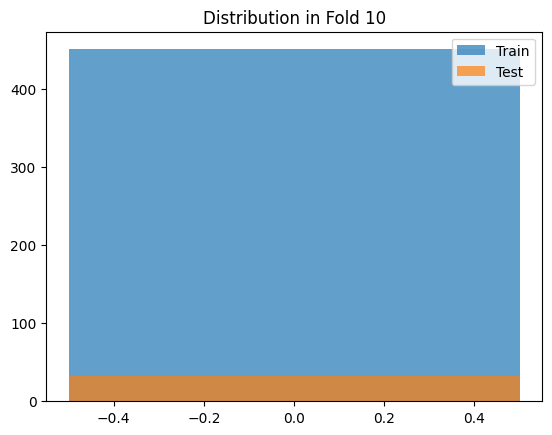

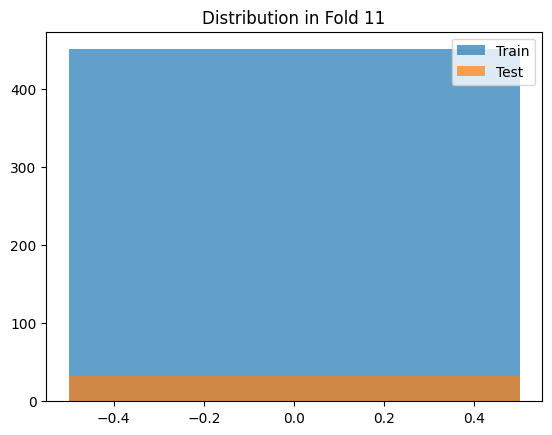

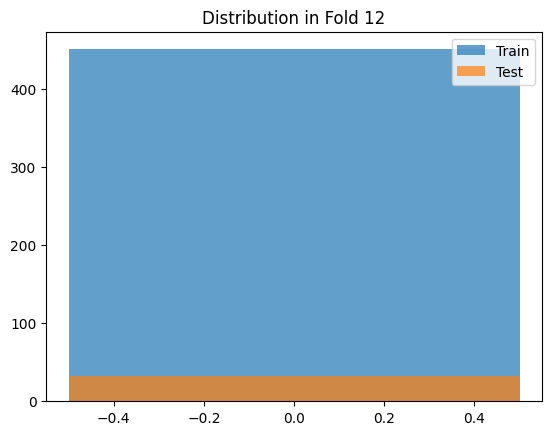

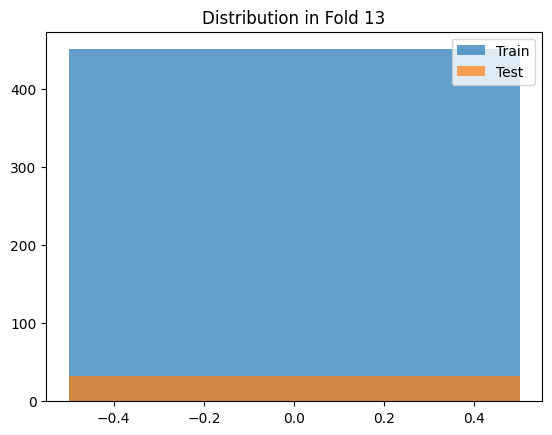

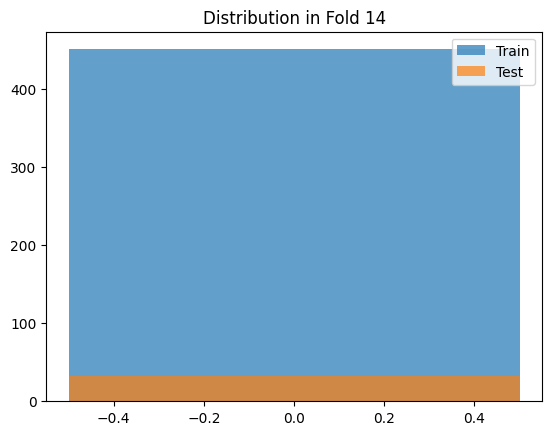

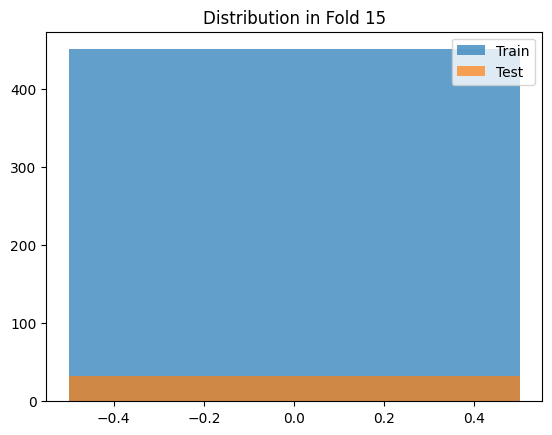

In [ ]:
plot_data_distribution(x, y, 15)

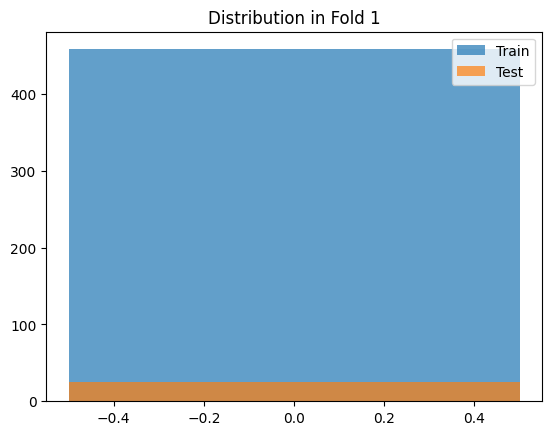

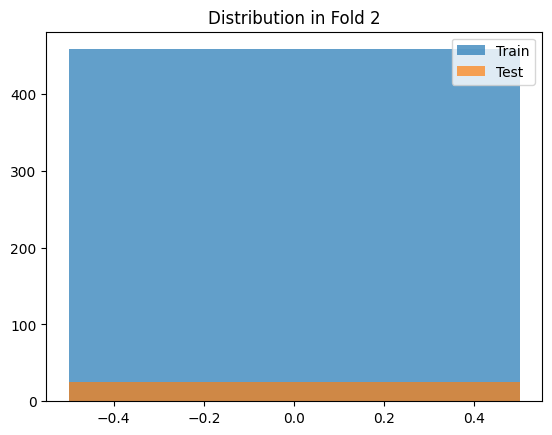

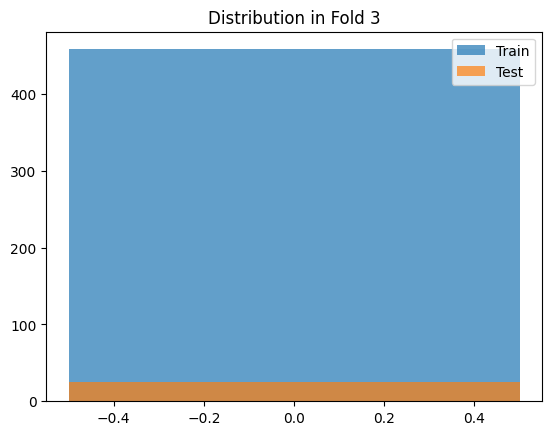

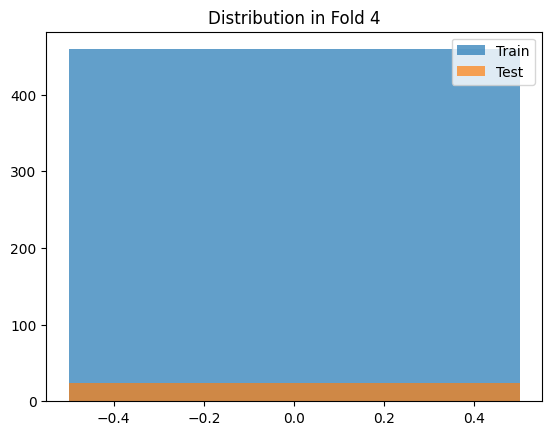

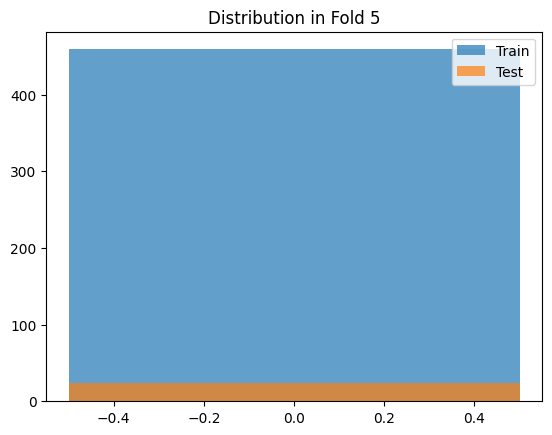

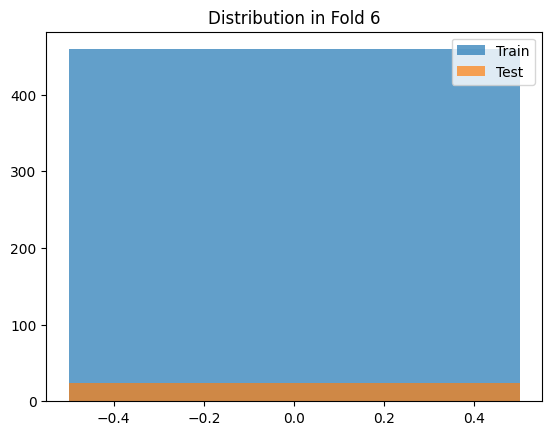

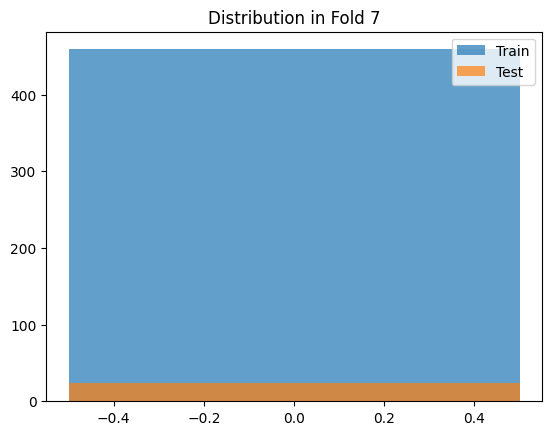

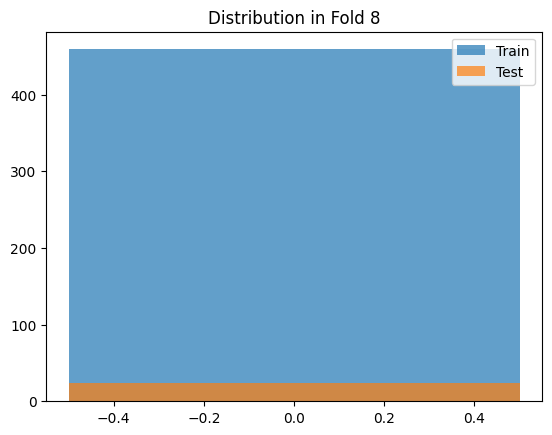

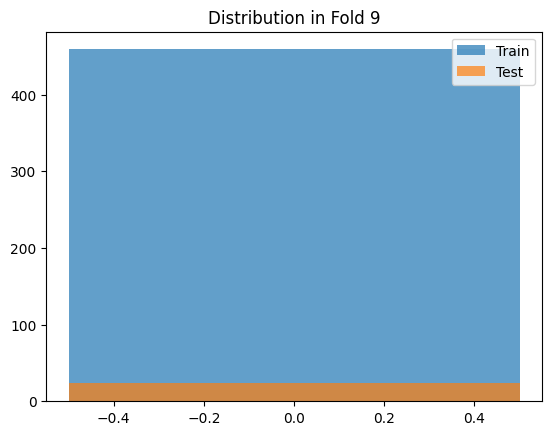

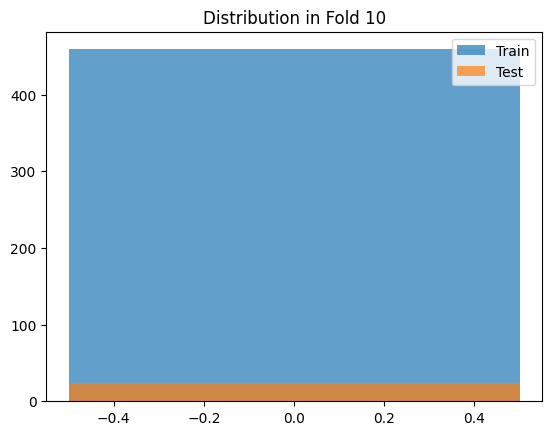

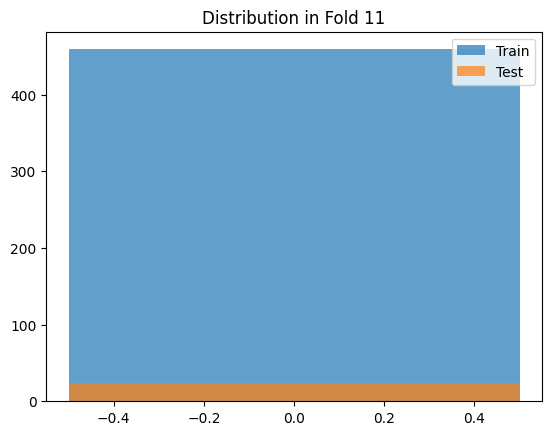

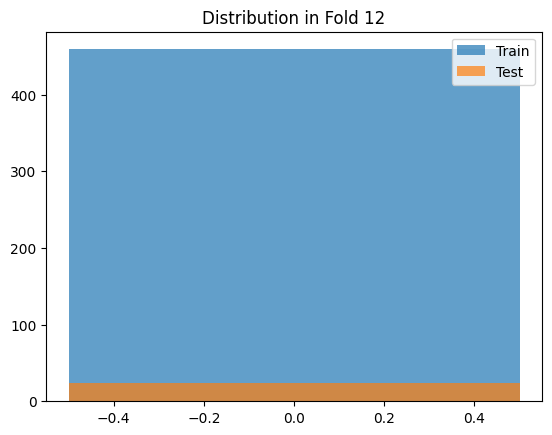

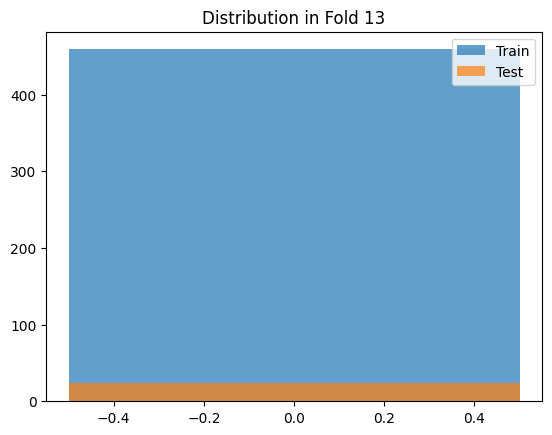

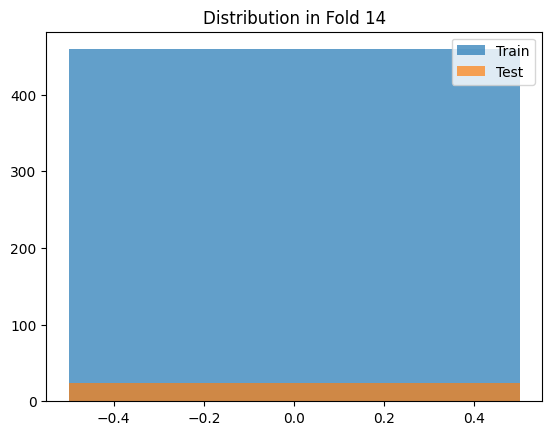

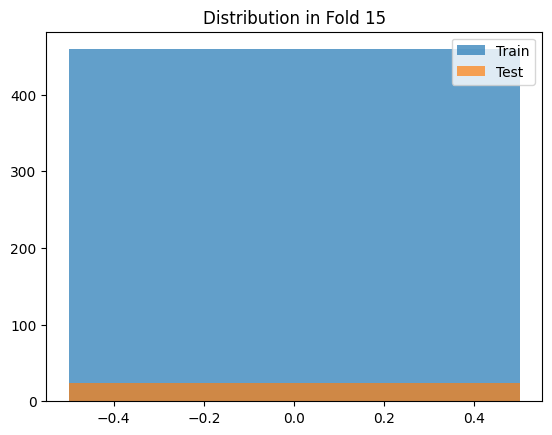

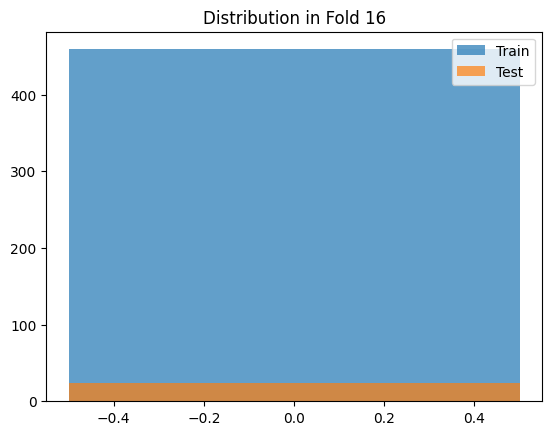

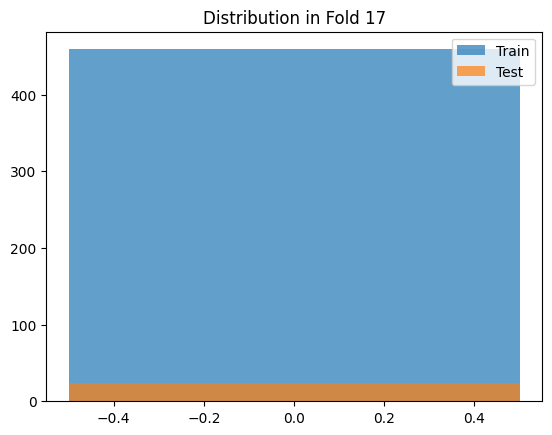

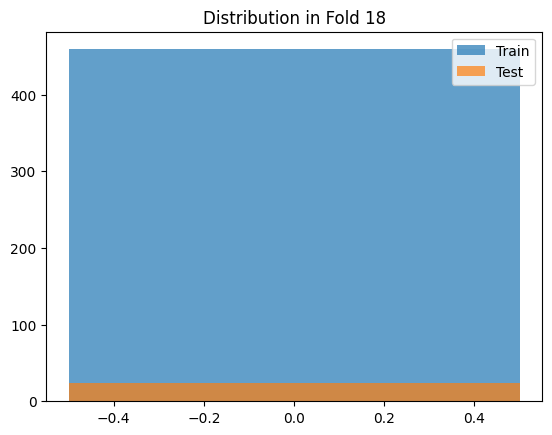

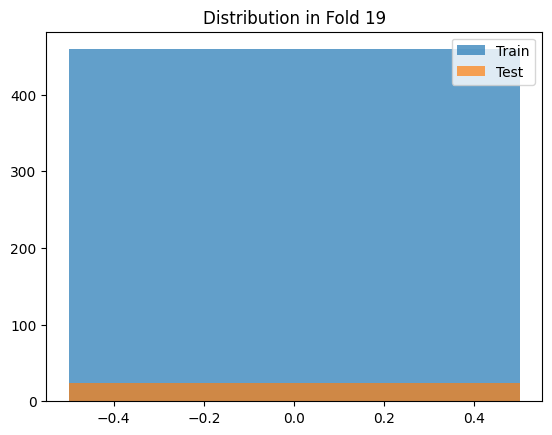

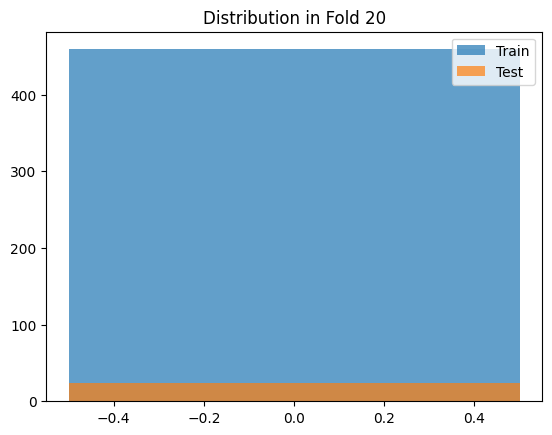

In [ ]:
plot_data_distribution(x, y, 20)

In [ ]:
# Menyimpan model Model A
model_A = GaussianNB()
model_A.fit(x_train_A, y_train_A)
joblib.dump(model_A, 'gaussian_nb_model_A.pkl')
joblib.dump(scaler, 'scaler_A.pkl')

# Menyimpan model Model B
model_B = GaussianNB()
model_B.fit(x_train_B, y_train_B)
joblib.dump(model_B, 'gaussian_nb_model_B.pkl')
joblib.dump(scaler, 'scaler_B.pkl')

# Menyimpan model Model C
model_C = GaussianNB()
model_C.fit(x_train_C, y_train_C)
joblib.dump(model_C, 'gaussian_nb_model_C.pkl')
joblib.dump(scaler, 'scaler_C.pkl')

# Menyimpan model Model D
model_D = GaussianNB()
model_D.fit(x_train_D, y_train_D)
joblib.dump(model_D, 'gaussian_nb_model_D.pkl')
joblib.dump(scaler, 'scaler_D.pkl')


['scaler_D.pkl']